# Heart disease predictor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [2]:
hrt = pd.read_csv('D:\\healthcare_faq\\heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
hrt.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
hrt.shape

(253680, 22)

In [5]:
hrt.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
ping = hrt.corr()

In [7]:
ping

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'HeartDiseaseorAttack'),
  Text(0, 1.5, 'HighBP'),
  Text(0, 2.5, 'HighChol'),
  Text(0, 3.5, 'CholCheck'),
  Text(0, 4.5, 'BMI'),
  Text(0, 5.5, 'Smoker'),
  Text(0, 6.5, 'Stroke'),
  Text(0, 7.5, 'Diabetes'),
  Text(0, 8.5, 'PhysActivity'),
  Text(0, 9.5, 'Fruits'),
  Text(0, 10.5, 'Veggies'),
  Text(0, 11.5, 'HvyAlcoholConsump'),
  Text(0, 12.5, 'AnyHealthcare'),
  Text(0, 13.5, 'NoDocbcCost'),
  Text(0, 14.5, 'GenHlth'),
  Text(0, 15.5, 'MentHlth'),
  Text(0, 16.5, 'PhysHlth'),
  Text(0, 17.5, 'DiffWalk'),
  Text(0, 18.5, 'Sex'),
  Text(0, 19.5, 'Age'),
  Text(0, 20.5, 'Education'),
  Text(0, 21.5, 'Income')])

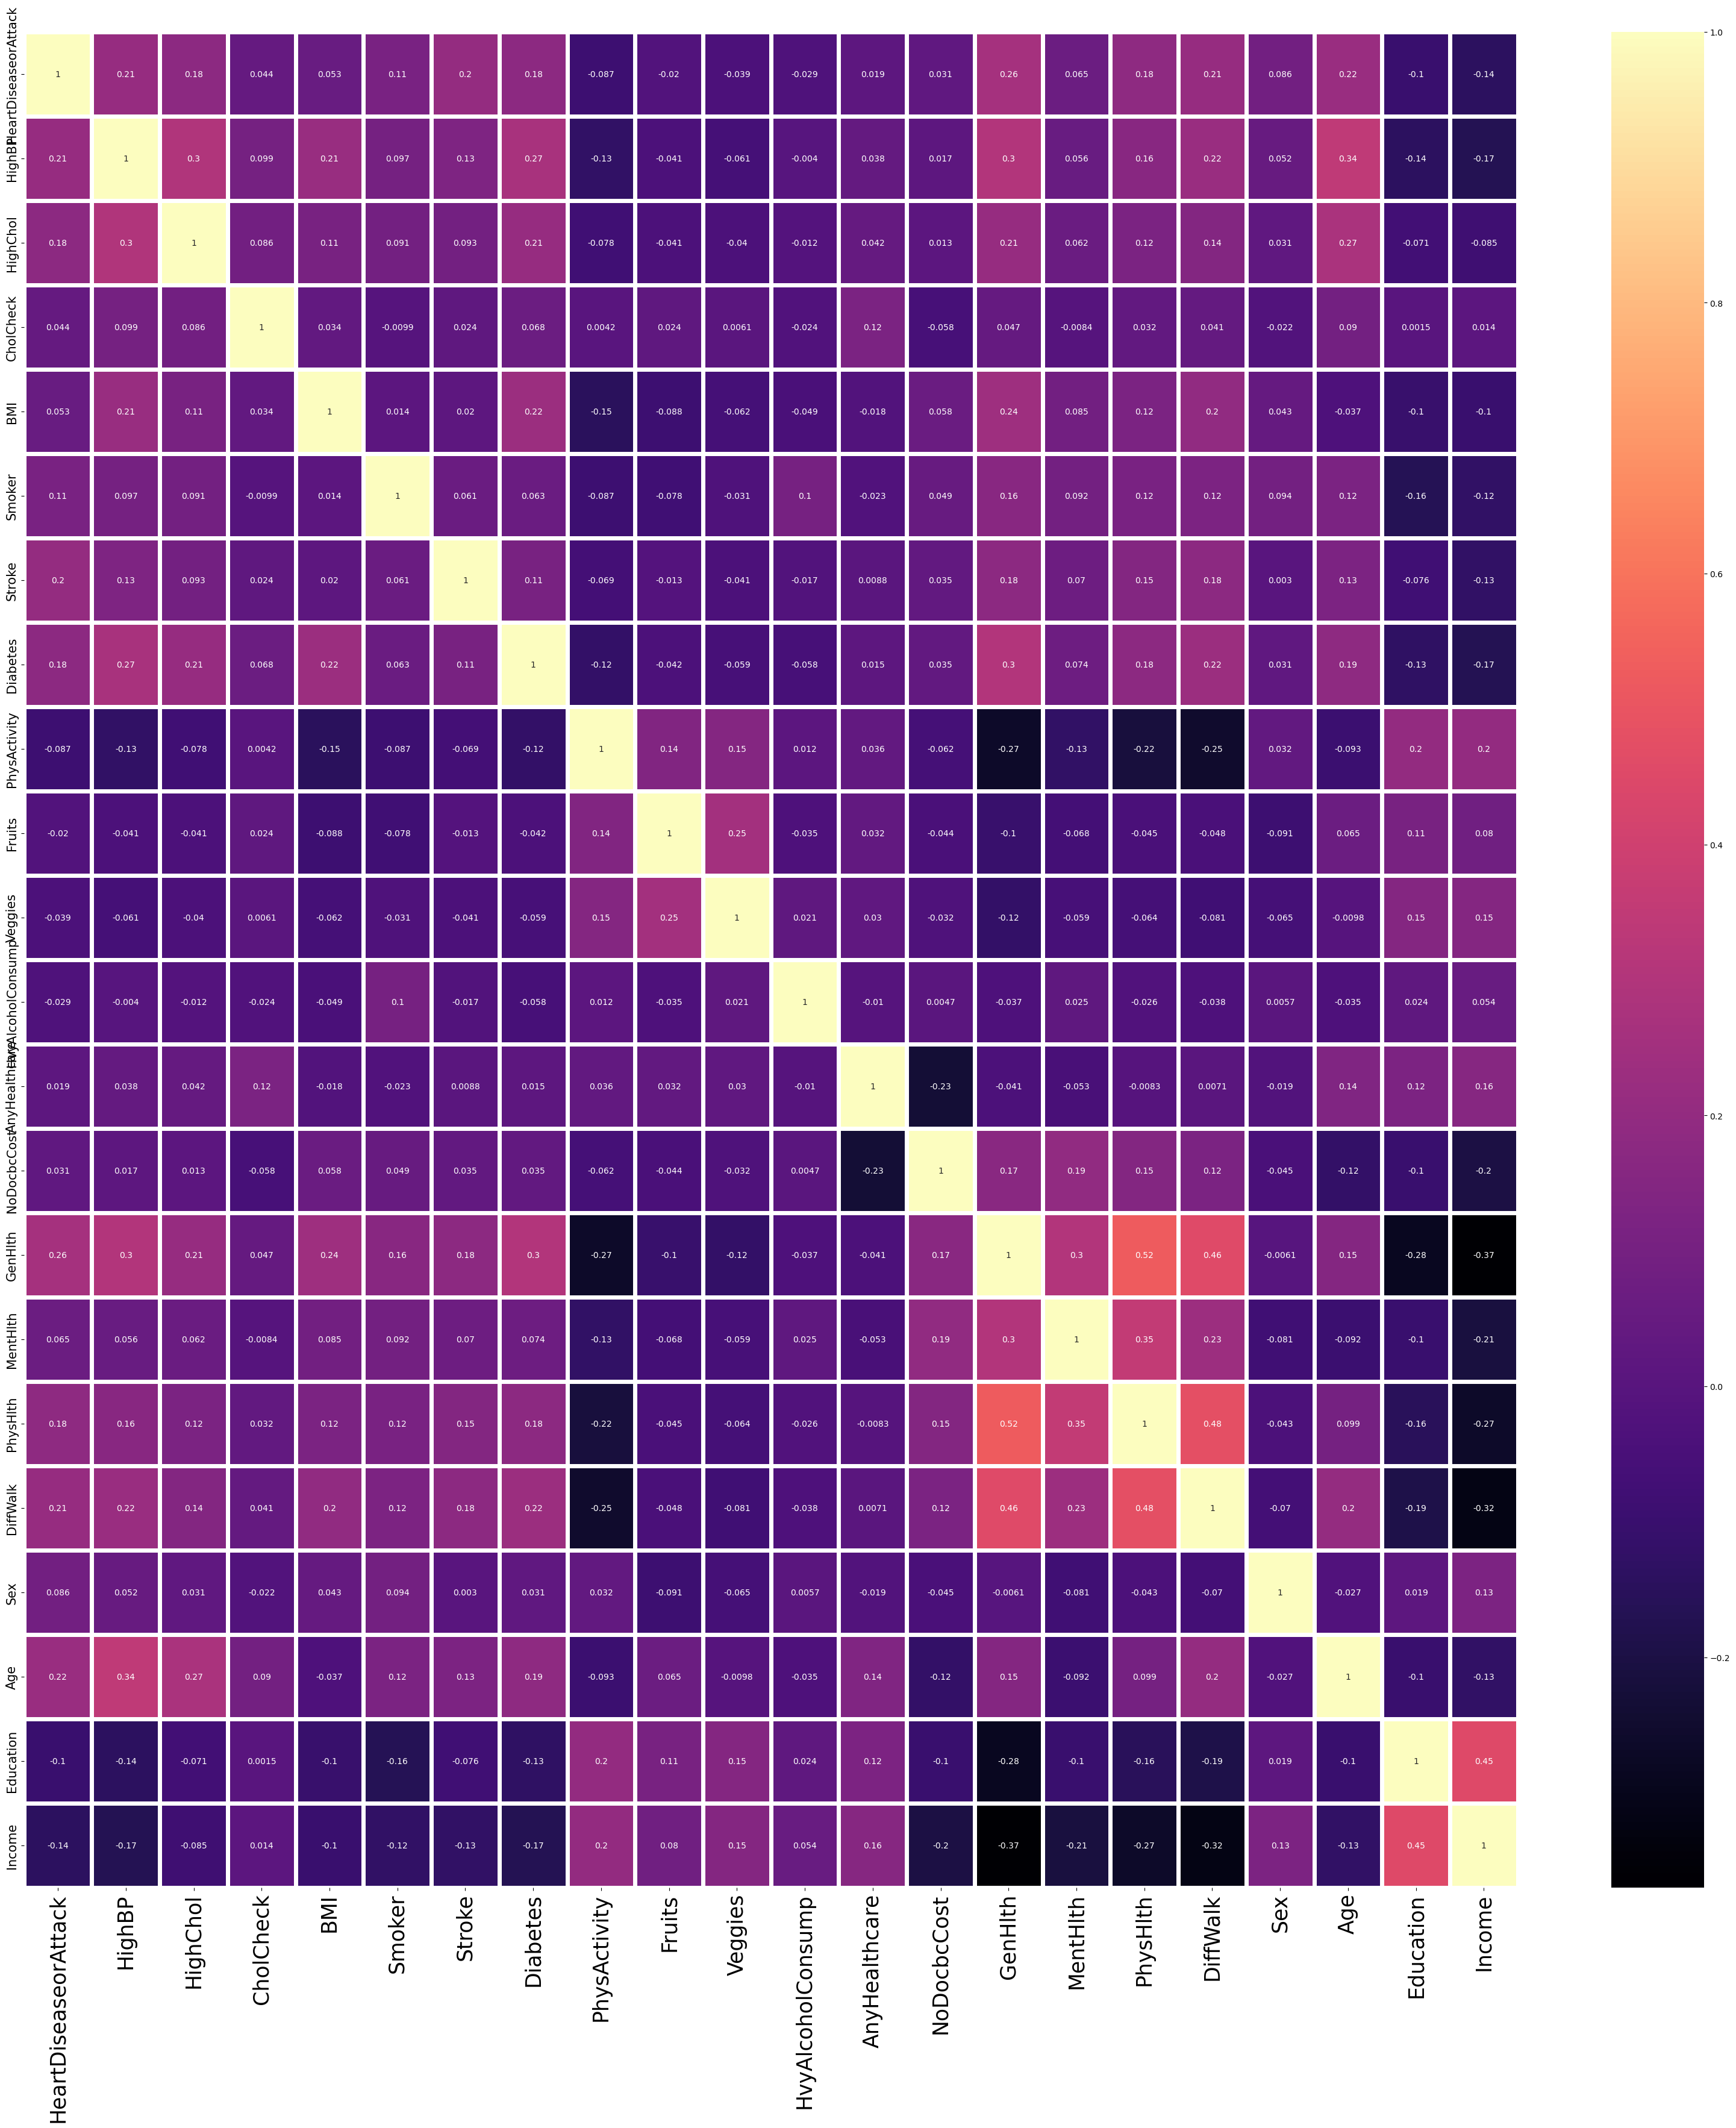

In [8]:
plt.figure(figsize=(40,40))
figure =sns.heatmap(ping,annot=True,cmap='magma',linewidth=5)
plt.xticks(size=25)
plt.yticks(size=15)

## as we need to predict the presence/possiblity of heart disease or attack ,and we can observ from the correlation table as well as the heatmap that some of the attributes such as PhysActivity ,fruits,veggies ,HvyAlcohol Consump, Education, Income has no effect on it,so we are removing those columns for more precision of our output

In [9]:
no_eff = ['PhysHlth','Fruits','Veggies','HvyAlcoholConsump','Education','Income']
for x in no_eff:
    hrt.drop([x],axis=1,inplace=True)

In [10]:
hrt.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0


In [11]:
hrt['HighBP'].value_counts()

0.0    144851
1.0    108829
Name: HighBP, dtype: int64

In [12]:
hrt['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

HeartDiseaseorAttack
0.0    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
1.0    [[Axes(0.125,0.722857;0.158163x0.157143), Axes...
dtype: object

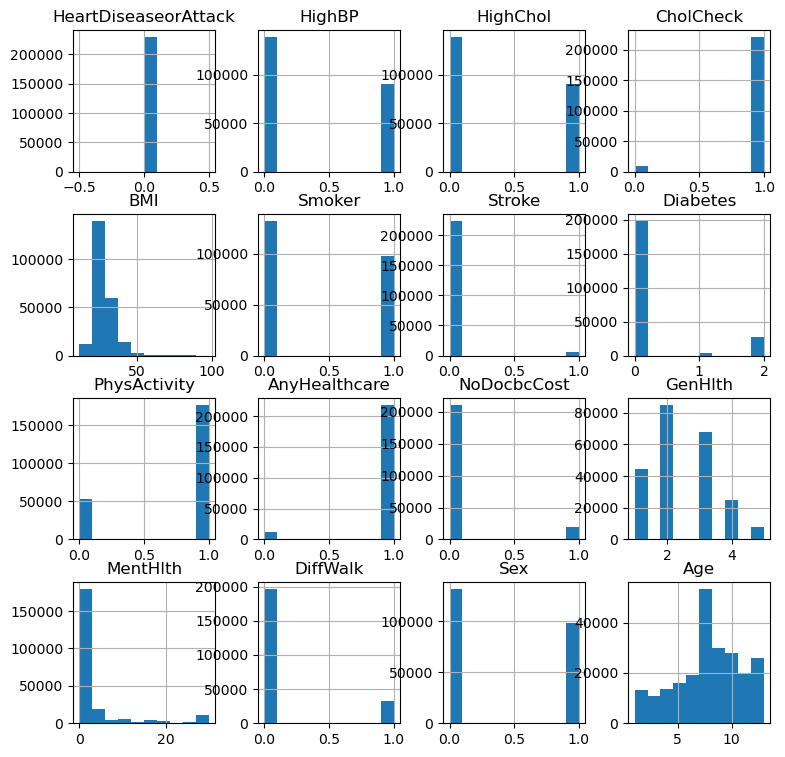

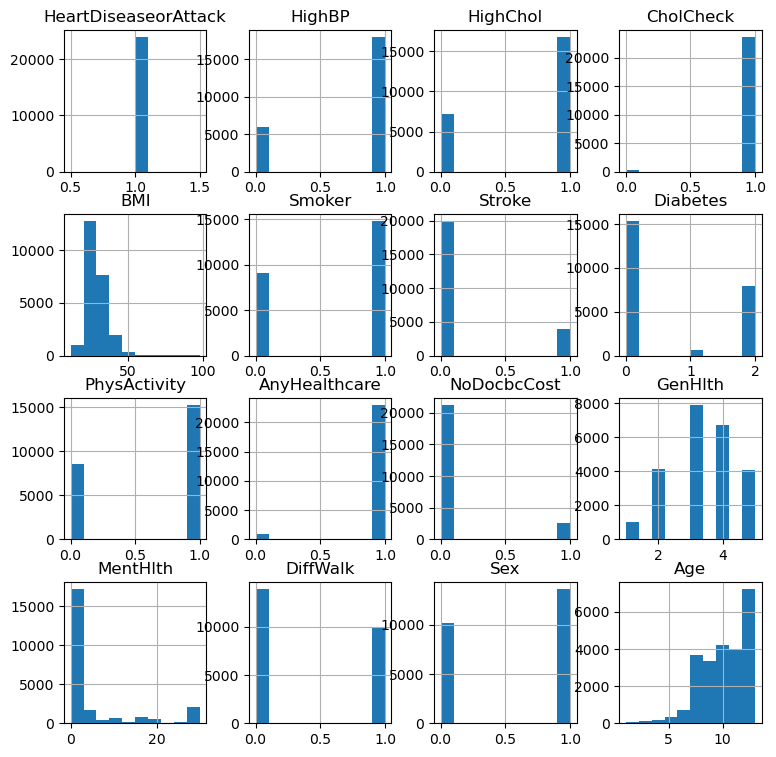

In [13]:
hrt.groupby('HeartDiseaseorAttack').hist(figsize=(9, 9))

In [14]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   AnyHealthcare         253680 non-null  float64
 10  NoDocbcCost           253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  DiffWalk              253680 non-null  float64
 14  Sex                   253680 non-null  float64
 15  

In [15]:
hrt.shape

(253680, 16)

In [16]:
X = hrt.loc[:,'HighBP':]
Y = hrt['HeartDiseaseorAttack']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [18]:
x_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Age
31141,0.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,12.0
98230,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,8.0
89662,1.0,1.0,1.0,24.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,12.0
208255,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0
233415,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,12.0


In [19]:
print('x_train ',x_train.shape)
print('y_train ',y_train.shape)
print('-'*12)
print('x_test ',x_test.shape)
print('x_test ',y_test.shape)

x_train  (202944, 15)
y_train  (202944,)
------------
x_test  (50736, 15)
x_test  (50736,)


## Logistic Regression

In [20]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

print("Training set accuracy: {:.3f}".format(lg.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(lg.score(x_test, y_test)))
print()

Training set accuracy: 0.907
Test set accuracy: 0.908



C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_pred = lg.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.54      0.13      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.73      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



array([[45456,   512],
       [ 4157,   611]], dtype=int64)

## Gausian Naive Baies

In [22]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

print("Training set accuracy: {:.3f}".format(gnb.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(gnb.score(x_test, y_test)))
print()

Training set accuracy: 0.832
Test set accuracy: 0.831



In [23]:
y_pred = gnb.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     45968
         1.0       0.28      0.52      0.37      4768

    accuracy                           0.83     50736
   macro avg       0.61      0.69      0.63     50736
weighted avg       0.88      0.83      0.85     50736



array([[39661,  6307],
       [ 2278,  2490]], dtype=int64)

## Decision Tree

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print("Training set accuracy: {:.3f}".format(dtc.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(dtc.score(x_test, y_test)))
print()

Training set accuracy: 0.967
Test set accuracy: 0.873



In [25]:
y_pred = dtc.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     45968
         1.0       0.28      0.23      0.25      4768

    accuracy                           0.87     50736
   macro avg       0.60      0.58      0.59     50736
weighted avg       0.86      0.87      0.87     50736



array([[43213,  2755],
       [ 3694,  1074]], dtype=int64)

In [26]:
from sklearn.tree import export_text,plot_tree
txt_tree = export_text(dtc)
print(txt_tree)

|--- feature_10 <= 3.50
|   |--- feature_14 <= 9.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_14 <= 7.50
|   |   |   |   |   |--- feature_10 <= 2.50
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- feature_14 <= 5.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- feature_14 >  4.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |  

## Random Forest Classifier

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=47,verbose=10)
rf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s


building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 

Accuracy on training set: 0.967


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


Accuracy on test set: 0.893


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


In [28]:
y_pred = rf.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
confusion_matrix(y_test,y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     45968
         1.0       0.35      0.17      0.23      4768

    accuracy                           0.89     50736
   macro avg       0.64      0.57      0.58     50736
weighted avg       0.86      0.89      0.88     50736



array([[44502,  1466],
       [ 3970,   798]], dtype=int64)

## Extra Trees Classifier

In [29]:
et = ExtraTreesClassifier(n_estimators=100, random_state=0,verbose = 10)
et.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(et.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(et.score(x_test, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.9s remaining:    0.0s


building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.3s remaining:    0.0s


building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.5s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.6s finished


Accuracy on training set: 0.967


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


Accuracy on test set: 0.888


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.7s finished


In [30]:
y_pred = et.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
confusion_matrix(y_test,y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished


              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     45968
         1.0       0.33      0.18      0.23      4768

    accuracy                           0.89     50736
   macro avg       0.62      0.57      0.59     50736
weighted avg       0.86      0.89      0.87     50736



array([[44219,  1749],
       [ 3914,   854]], dtype=int64)

## Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbc.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(x_test, y_test)))


Accuracy on training set: 0.908
Accuracy on test set: 0.908


In [32]:
y_pred = gbc.predict(x_test)
report = classification_report(y_test,y_pred)

In [33]:
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.56      0.11      0.19      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736



In [34]:
confusion_matrix(y_test,y_pred)

array([[45550,   418],
       [ 4235,   533]], dtype=int64)

## Neural networks

In [35]:
import tensorflow as tf
from keras.models import Sequential # It is linear stack of layers)
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(157, activation = 'relu', input_shape=(x_train.shape[1], )),   #
    tf.keras.layers.Dense(50, activation = 'sigmoid'),
    tf.keras.layers.Dense(42,activation = 'sigmoid'),
    tf.keras.layers.Dense(95,activation = 'sigmoid'),
    tf.keras.layers.Dense(42,activation = 'relu'),
    tf.keras.layers.Dense(75,activation = 'sigmoid'),
    tf.keras.layers.Dense(1,activation = 'softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 157)               2512      
                                                                 
 dense_1 (Dense)             (None, 50)                7900      
                                                                 
 dense_2 (Dense)             (None, 42)                2142      
                                                                 
 dense_3 (Dense)             (None, 95)                4085      
                                                                 
 dense_4 (Dense)             (None, 42)                4032      
                                                                 
 dense_5 (Dense)             (None, 75)                3225      
                                                                 
 dense_6 (Dense)             (None, 1)                 7

In [37]:
 model.variables

[<tf.Variable 'dense/kernel:0' shape=(15, 157) dtype=float32, numpy=
 array([[ 0.13441667,  0.17123657, -0.07506561, ..., -0.01215786,
         -0.1671811 ,  0.16516626],
        [-0.17757335, -0.11978078, -0.10995811, ..., -0.09922085,
         -0.0066072 , -0.09092093],
        [-0.16641393,  0.15318257,  0.05028051, ...,  0.13436139,
          0.1673471 ,  0.07267591],
        ...,
        [ 0.06967631,  0.01570831,  0.03865674, ..., -0.06214117,
          0.10276753,  0.17737782],
        [ 0.10525379,  0.0150108 , -0.04956028, ...,  0.10072359,
          0.1592372 , -0.09803226],
        [-0.14093056,  0.046884  , -0.1155716 , ...,  0.01350102,
         -0.09065606,  0.13456541]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(157,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [38]:
# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [39]:
# Fitting the ANN to the Training set
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
2030/2030 [==============================] - 12s 5ms/step - loss: 0.2583 - accuracy: 0.0942 - val_loss: 0.2421 - val_accuracy: 0.0940
Epoch 2/20
2030/2030 [==============================] - 9s 4ms/step - loss: 0.2430 - accuracy: 0.0942 - val_loss: 0.2391 - val_accuracy: 0.0940
Epoch 3/20
2030/2030 [==============================] - 9s 4ms/step - loss: 0.2415 - accuracy: 0.0942 - val_loss: 0.2401 - val_accuracy: 0.0940
Epoch 4/20
2030/2030 [==============================] - 8s 4ms/step - loss: 0.2407 - accuracy: 0.0942 - val_loss: 0.2407 - val_accuracy: 0.0940
Epoch 5/20
2030/2030 [==============================] - 9s 5ms/step - loss: 0.2401 - accuracy: 0.0942 - val_loss: 0.2374 - val_accuracy: 0.0940
Epoch 6/20
2030/2030 [==============================] - 9s 4ms/step - loss: 0.2396 - accuracy: 0.0942 - val_loss: 0.2373 - val_accuracy: 0.0940
Epoch 7/20
2030/2030 [==============================] - 8s 4ms/step - loss: 0.2394 - accuracy: 0.0942 - val_loss: 0.2395 - val_accuracy

In [40]:
y_pred = model.predict(x_test)

1586/1586 [==============================] - 5s 2ms/step


In [41]:
report = classification_report(y_test,y_pred)

C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     45968
         1.0       0.09      1.00      0.17      4768

    accuracy                           0.09     50736
   macro avg       0.05      0.50      0.09     50736
weighted avg       0.01      0.09      0.02     50736



In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.09397666351308735